# Time Series Analysis -- Using Classical Statistics -- Arima, Sarimax

In [1]:
#Standard Imports
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'

In [3]:
am = auto_arima(df['Thousands of Passengers'],seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.79 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.12 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.49 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.17 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.48 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.09 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.14 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.46 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.41 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.81 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.05 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(3,1,1)(0,1,0

In [4]:
am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Thu, 19 Aug 2021   AIC                           1017.847
Time:                                     23:50:05   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.602      0.000      -1.057      -0.907
sigma2       129.3148     14.557      8.883      0.000     100.784     157.846
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
train = df[:120]
test = df[120:]

In [6]:
model = SARIMAX(train['Thousands of Passengers'], order=(2,1,1), seasonal_order=(0,1,0,12))

In [7]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                  120
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -399.396
Date:                             Thu, 19 Aug 2021   AIC                            806.793
Time:                                     23:50:13   BIC                            817.484
Sample:                                 01-01-1949   HQIC                           811.127
                                      - 12-01-1958                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5942      1.469     -0.405      0.686      -3.473       2.284
ar.L2         -0.0258      0.411     -0.063      0.950      -0.831       0.779
ma.L1          0.3719      1.470      0.253      0.800      -2.510       3.253
sigma2       102.1917     13.100      7.801      0.000      76.516     127.867
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.72
Prob(Q):                              0.97   Prob(JB):                         0.26
Heteroskedasticity (H):               1.48   Skew:                            -0.03
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
#run predictions now
predictions = results.predict(
                start=len(train),
                end=len(train)+len(test)-1,
                typ='levels').rename('SARIMA Predictions')

<AxesSubplot:xlabel='Month'>

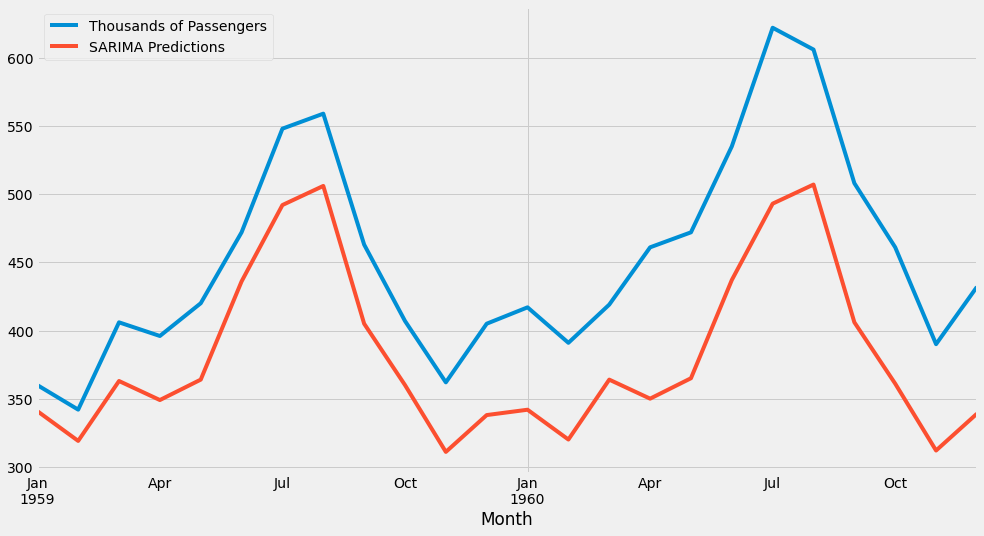

In [9]:
test.plot(figsize=(15,8),legend=True)
predictions.plot(legend=True)

# Trying to predict the change in Passengers from previous year

In [10]:
from statsmodels.tsa.statespace.tools import diff
df_diff = pd.DataFrame(diff(df['Thousands of Passengers'],k_diff=1,seasonal_periods=12))

In [11]:
am_diff = auto_arima(df_diff['Thousands of Passengers'],seasonal=True, m=12, trace=True, stationary=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1415.278, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1299.257, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1413.909, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1398.827, Time=0.06 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1146.801, Time=0.33 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1146.154, Time=0.28 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=1146.333, Time=0.61 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,0,2)(1,0,0)[12] intercept   : AIC=1148.149, Time=0.31 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,0,1)(1,0,0)[12]             : AIC=1144.1

In [12]:
am_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  143
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 12)   Log Likelihood                -564.883
Date:                             Thu, 19 Aug 2021   AIC                           1139.765
Time:                                     23:50:49   BIC                           1154.579
Sample:                                          0   HQIC                          1145.785
                                             - 143                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6417      0.089      7.207      0.000       0.467       0.816
ar.L2          0.1602      0.089      1.795      0.073      -0.015       0.335
ma.L1         -0.9648      0.039    -25.006      0.000      -1.040      -0.889
ar.S.L12       0.9606      0.020     49.258      0.000       0.922       0.999
sigma2       128.3974     14.213      9.034      0.000     100.541     156.254
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.60
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               3.67   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
train_diff = df_diff[:120]
test_diff = df_diff[120:]

In [14]:
model_diff = SARIMAX(train_diff['Thousands of Passengers'], order=(2,0,1), seasonal_order=(1,0,0,12))

In [15]:
results_diff = model_diff.fit()
results_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                  120
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 12)   Log Likelihood                -460.179
Date:                             Thu, 19 Aug 2021   AIC                            930.358
Time:                                     23:50:57   BIC                            944.296
Sample:                                 02-01-1949   HQIC                           936.018
                                      - 01-01-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7210      0.107      6.768      0.000       0.512       0.930
ar.L2          0.0898      0.096      0.939      0.348      -0.098       0.277
ma.L1         -0.9627      0.040    -23.832      0.000      -1.042      -0.884
ar.S.L12       0.9566      0.026     37.431      0.000       0.906       1.007
sigma2        98.8736     12.502      7.908      0.000      74.369     123.378
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.01
Prob(Q):                              0.98   Prob(JB):                         0.03
Heteroskedasticity (H):               2.79   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
#run predictions now
predictions_diff = results_diff.predict(
                start=len(train_diff),
                end=len(train_diff)+len(test_diff)-1,
                typ='levels').rename('SARIMA Predictions -- Diff')

<AxesSubplot:xlabel='Month'>

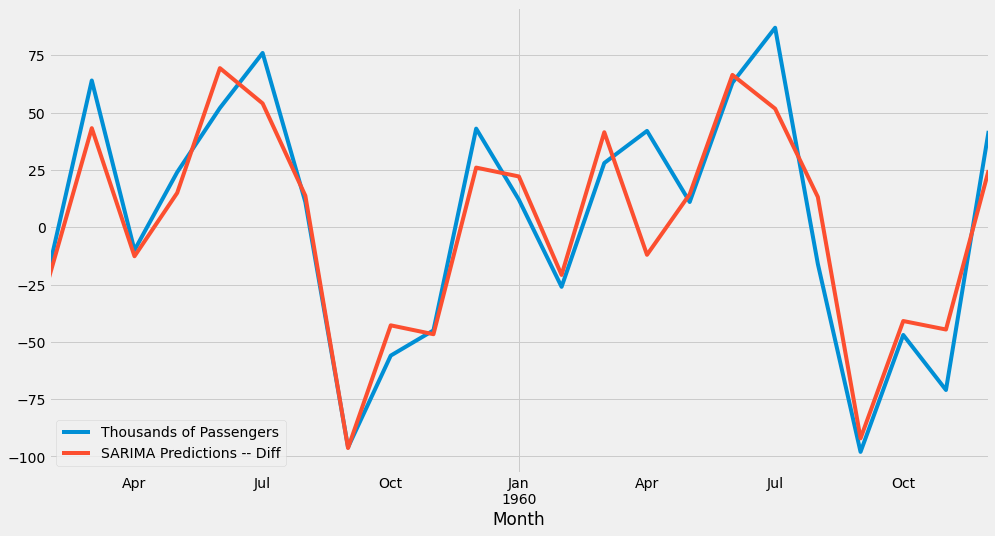

In [17]:
test_diff.plot(figsize=(15,8),legend=True)
predictions_diff.plot(legend=True)

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [21]:
error = mean_squared_error(test['Thousands of Passengers'], predictions)
print(f'SARIMAX: RMSE Error: {sqrt(error):5.5}')

SARIMAX: RMSE Error: 75.436


In [19]:
error_diff = mean_squared_error(test_diff['Thousands of Passengers'], predictions_diff)
print(f'SARIMAX-Diff: RMSE Error: {sqrt(error_diff):5.5}')

SARIMAX-Diff: RMSE Error: 18.891
